
# Computer vision
## Session 5b
### Face Recognition
- using AT&T DataSet



In [11]:
# Import some libraries
import os

import numpy as np


import pandas as pd

import matplotlib.pyplot as plt

import cv2

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

# %matplotlib notebook

In [12]:
# Some basic parameters
inpDir = '../input'
outDir = '../output'
dataDir = 'at'

RANDOM_STATE = 24

np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (9, 6),
          'axes.labelsize': 'medium',
          'axes.titlesize':'medium',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

plt.rcParams.update(params)

CMAP = 'jet'

LINE_THICK = 1

# Arbit color to mark rectangles on the images
MARK_COLOR = (15, 82, 186)

## Helper function

In [13]:
# Function to plot one image

def fn_plot_one_img(im, cmap = CMAP):
    
    '''
    Args:
        im : image to display and save
    
    '''
    # showing image
    plt.imshow(im, cmap = cmap)
    plt.axis('off')
    plt.show()

    
# Function to plot multiple images

def fn_plot_images(im_lst):
    '''
    Args:
        img_list: list of images
    '''
    nRows = 1
    nCols = len(im_lst)
    
    
    fig, axes = plt.subplots(nRows, nCols)
    
    for i in range(nCols):
        axes[i].imshow(im_lst[i]['img'], cmap = im_lst[i]['cmap'])
        axes[i].set_title(im_lst[i]['name'])

        axes[i].set_xticklabels([]);
        axes[i].set_yticklabels([]);
                
    plt.tight_layout()
    
    plt.show()

### Read Images

In [21]:
# Read an Image 
def fn_read_image(imgPath):
    '''
    Args:
        fileName : Path of image file to read
    returns:
        im: image in cv2 Gray format
    
    '''
#     imgPath = os.path.join(inpDir, dataDir, fileName)
    
    # Read image file
    im = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE)
    
    if im is None:
        print('Could not open or find the image:', fileName)
        exit(0)
    else:
        return im
    
def fn_create_test_train_from_dir(path):
    
    '''
    Args: 
        path of image folders
    Returns:
        dataframe with the path and labels
    
    '''
    # Two lists for collecting data
    imgs_train, y_train, imgs_test, y_test = [], [], [], []
    
    # Walk through the source dir
    for dirName, subDirNames, fileNames in os.walk(path):
        
        # Iterate over directories
        for subDir in subDirNames:
            
            # Assemble directory name
            subjectPath = os.path.join(dirName, subDir)
            
            # extract label information
            label = int(subjectPath.split('/')[-1][1:])
            
            tCount = 0
            for fileName in os.listdir(subjectPath):
                
                tCount += 1
                
                # Split the path to get file extn
                fileExt = os.path.splitext(fileName)[1]
                
                # consider pgm images only
                if fileExt == '.pgm':
                    
                    absPath = os.path.join(subjectPath, fileName)
                    
                    #print ('{},{}'.format(abs_path, label))
                    
                    if tCount == 10:
                        imgs_test.append(fn_read_image(absPath))
                    
                        y_test.append(label)
                        
                    else:
                        
                        imgs_train.append(fn_read_image(absPath))
                        
                        y_train.append(label)
                    

    
    return np.array(imgs_train), np.array(y_train), np.array(imgs_test), np.array(y_test)

In [15]:
base_path = os.path.join(inpDir, dataDir)


In [16]:
base_path 

'../input/at'

In [17]:
inpDir

'../input'

In [18]:
dataDir

'at'

In [20]:
base_path = os.path.join(inpDir, dataDir)

imgs_train, y_train, imgs_test, y_test = fn_create_test_train_from_dir(base_path)

###  Create EigenFaceRecognizer Model

Create a data matrix containing all images as a row vector. 

In [22]:
model = cv2.face.EigenFaceRecognizer_create()

model.train(imgs_train, y_train)

- `num_components`: The number of components (read: Eigenfaces) kept for this Principal Component Analysis. As a hint: There's no rule how many components (read: Eigenfaces) should be kept for good reconstruction capabilities. It is based on your input data, so experiment with the number. Keeping 80 components should almost always be sufficient.
- `threshold`: The threshold applied in the prediction.

In [23]:
y_pred = []

for img, label in zip(imgs_train, y_train):
    
    pred, confidence = model.predict(img)
    
    y_pred.append(pred)
    
y_pred = np.array(y_pred)

In [24]:
print('Accuracy score on Train Data :', accuracy_score(y_train, y_pred))

Accuracy score on Train Data : 1.0


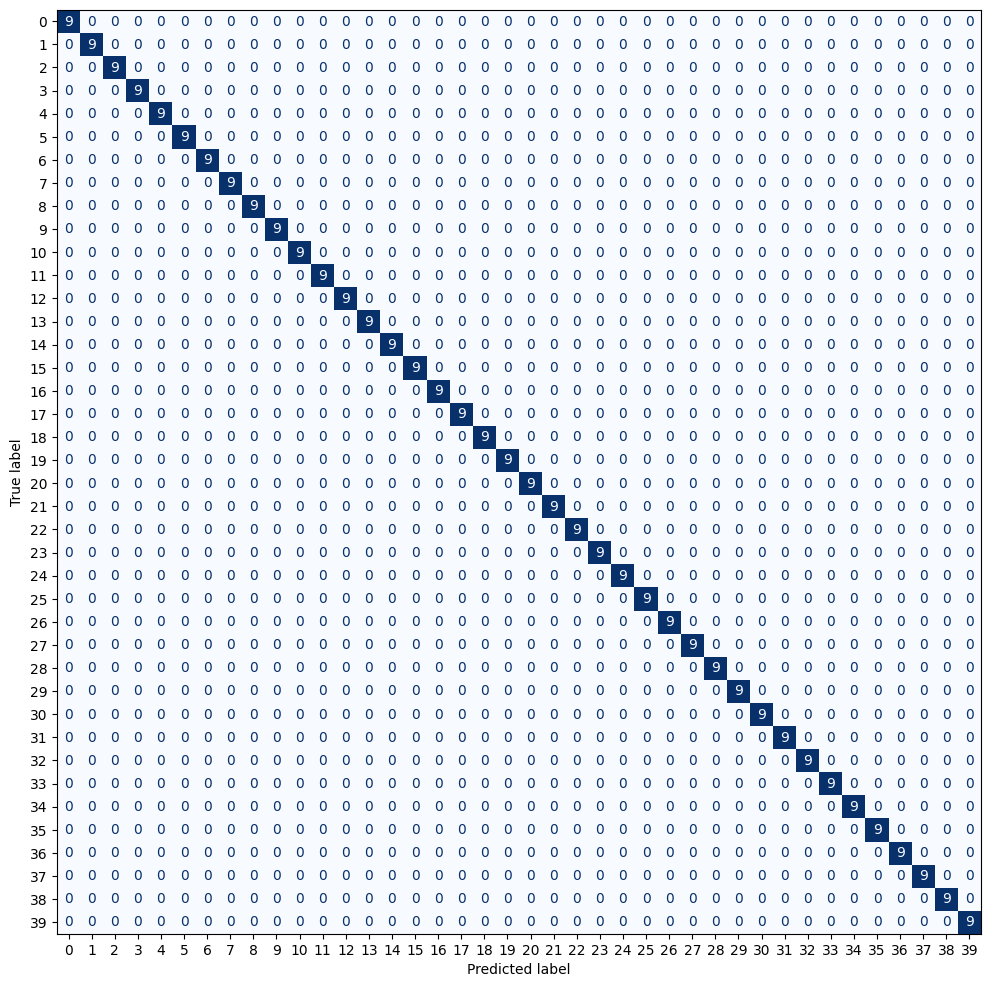

In [25]:
cm = confusion_matrix(y_train, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize = (12,12))

disp.plot(ax = ax, cmap=plt.cm.Blues, colorbar=False);

#ax.set_xticklabels(class_names,rotation=45, ha='right');

In [26]:
y_pred = []
for img, label in zip(imgs_test, y_test):
    
    pred, confidence = model.predict(img)
    
    y_pred.append(pred)
        
y_pred = np.array(y_pred)

In [27]:
print('Accuracy score on Test Data :', accuracy_score(y_test, y_pred))

Accuracy score on Test Data : 0.975


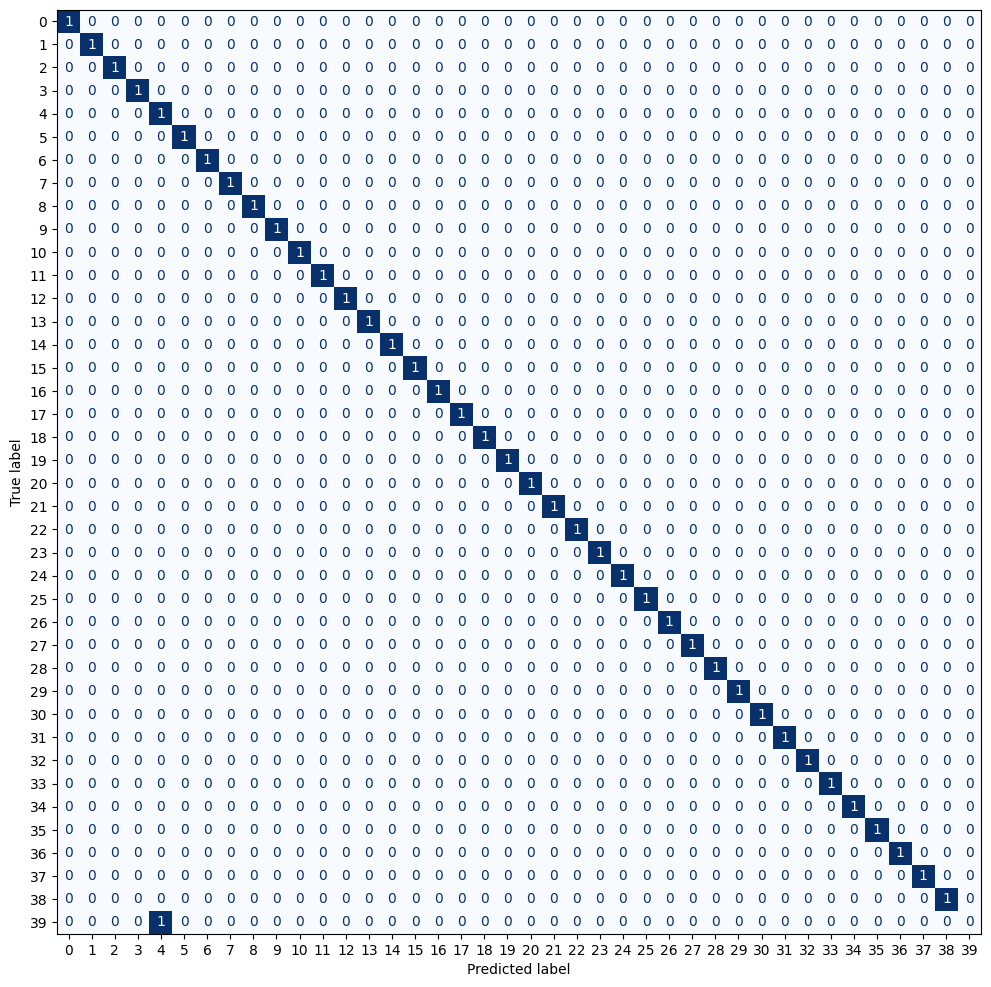

In [28]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize = (12,12))

disp.plot(ax = ax, cmap=plt.cm.Blues, colorbar=False);

#ax.set_xticklabels(class_names,rotation=45, ha='right');